

# Project: Investigate Imbd movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I have choosen the dataset Imbd movie data to explore. In this database of more than 10'000 entries, it is exiting to analyze some questions. I will hopefully find some interesting relationship (tentatively on a statistical point of view) between them and a successful film in terms either of revenue or rating.

The dataset has the following parameters
<table>
  <tr>
    <th>Parameters</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>id</td>
    <td>id number</td>
  </tr>
  <tr>
    <td>imdb_id</td>
    <td>id number form imbd</td>
  </tr>  
    <tr>
    <td>popularity</td>
    <td>The MOVIEmeter rank of a film is a measure of popularity. It is essentially based on page views of pages    related to a film.<br>IMDb will not disclose specifics about how they calculate this measure,since it is a proprietary method,<br> and to prevent people from inflating or distorting this measure.<br>The MOVIEmeter rank is calculated on a weekly basis.<br> Source:https://getsatisfaction.com/imdb/topics/how-is-popularity-for-movies-calculated</td>
  </tr>  
    <tr>
    <td>budget</td>
    <td>budget allocated for a film</td>
  </tr>  <tr>
    <td>revenue</td>
    <td>revenue generated by the film</td>
  </tr>  
    <tr>
    <td>original_title</td>
    <td>Original title of the film</td>
  </tr>  
    <tr>
    <td>cast</td>
    <td>actors playing in the film</td>
  </tr>  <tr>
    <td>homepage</td>
    <td>website of the film</td>
  </tr>  
    <tr>
    <td>director</td>
    <td>director of the film</td>
  </tr>  
    <tr>
    <td>tagline</td>
    <td>keyword concerning the film given by imbd members</td>
  </tr>
    <tr>
    <td>overview</td>
    <td>brief description of the film</td>
  </tr>
    <tr>
    <td>runtime</td>
    <td>duration of the film</td>
  </tr>
    <tr>
    <td>genres</td>
    <td>in which category the film is given by imbd members</td>
  </tr>
    <tr>
    <td>production_companies</td>
    <td>companies which produced the film</td>
  </tr>
    <tr>
    <td>release_date</td>
    <td>when the film was released in movies theater</td>
  </tr>
    <tr>
    <td>vote_count</td>
    <td>number of imbd members who voted for the film</td>
  </tr>
    <tr>
    <td>vote_average</td>
    <td>average score of the film from imbd voters</td>
  </tr>
    <tr>
    <td>release_year</td>
    <td>which year the film was released</td>
  </tr>
    <tr>
    <td>budget_adj</td>
    <td>show the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time</td>
  </tr>
    <tr>
    <td>revenue_adj</td>
    <td>show the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time</td>
  </tr>
</table>
<br>
We will explore data and answer the questions regarding 3 domains:  
<br>
<li>Exploration regarding film category</li>

What is the total number of movies in different categories?<br>
What was the landscape of film category in 2015?<br>
What is the trend of drama film from year to year?<br>
Which genres are most popular from year to year?
<br>
<li>Exploration regarding vote_average</li>
What are the first 10 films in terms of vote_average?<br>
Which vote average got the 10 most expensive films in terms of budget?<br>
Does the rating vary year from year?<br>
Which rating got films with a duration above the mean?
<br>
<li>Exploration regarding revenue</li>
Is the number of action film generating high revenue is higher in 2010 compared to 2000?<br>
Which films were above median revenue (the first 10)?<br>
Which director did more than 15 films above median revenue?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

We will explore now the dataset and check the information available

In [2]:
df=pd.read_csv('tmdb-movies1.csv')

In [3]:
df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns. Below we can see the information available

In [4]:
df.iloc[1]

id                                                                  76341
imdb_id                                                         tt1392190
popularity                                                        28.4199
budget                                                          150000000
revenue                                                         378436354
original_title                                         Mad Max: Fury Road
cast                    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
homepage                                      http://www.madmaxmovie.com/
director                                                    George Miller
tagline                                                What a Lovely Day.
keywords                 future|chase|post-apocalyptic|dystopia|australia
overview                An apocalyptic story set in the furthest reach...
runtime                                                               120
genres                          Action

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see there are some null values in the dataset for:
homepage, cast, tagline, keywords, overview, genres and production_companies. Below we can see the number of them missing.

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We have already noticed that some columns like cast, genres, production_companies have multiple information seperated by a '|'. Some columns like imdb_id, cast, homepage, tagline, keywords will be dropped because these are not useful for our investigation.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


According to the above, some additional rows like budget, budget_adj,runtime, revenue_adj, revenue have value equal to '0' as the min is 0. We will drop the specific row with value '0' or null to avoid any misunderstanding in the analysis. It is relatively safe as the numbers are not high. Below I have checked that my assumption is true with value = 0.

In [8]:
df.loc[df['runtime'] == 0.0].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


After checking these points we will now drop non related columns and those with missing values.

### Data Cleaning 

We have then several issues concerning the data. After dropping useless columns it remains some missing values for cast, directors and genres. After analysing the data for cast as a null value, I have decided to drop them completely as the number is small and they have no value in other columns such revenue or budget which is then useless for the investigation I am pursuing. This will be the same approach for the director column. Finally, genres was fine after the second cleaning process (i.e. director). It should not affect the overall analysis as it was dropping an additional of 16 rows out of an over 10'000 data.

In [9]:
df1=df.drop(['imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies','release_date','budget_adj','revenue_adj'], axis =1)

In [10]:
df1.head()

,id,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 933.9+ KB


There are still some missing values and we will check if this is possible just to drop them as well if additional information is missing such as revenue or budget

In [12]:
df1[df1.cast.isnull()].head()

,id,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
371,345637,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,47,6.9,2015
441,355020,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,37,8.2,2015
465,321109,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,19,7.8,2015
536,333350,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,12,8.0,2015
538,224972,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,11,8.9,2015


In [13]:
dff=df1.dropna(subset=['cast'])

In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10790 entries, 0 to 10865
Data columns (total 11 columns):
id                10790 non-null int64
budget            10790 non-null int64
revenue           10790 non-null int64
original_title    10790 non-null object
cast              10790 non-null object
director          10752 non-null object
runtime           10790 non-null int64
genres            10768 non-null object
vote_count        10790 non-null int64
vote_average      10790 non-null float64
release_year      10790 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 1011.6+ KB


In [15]:
dff[dff.director.isnull()]. head()

,id,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
532,320996,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,14,6.6,2015
548,355131,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,12,7.5,2015
556,321160,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,14,6.5,2015
1032,259910,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,32,6.3,2014
1054,253675,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,11,7.2,2014


In [16]:
dff1=dff.dropna(subset=['director', 'genres'])

In [17]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 11 columns):
id                10732 non-null int64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 1006.1+ KB


In [18]:
dff1[dff1['budget']==0].count()

id                5578
budget            5578
revenue           5578
original_title    5578
cast              5578
director          5578
runtime           5578
genres            5578
vote_count        5578
vote_average      5578
release_year      5578
dtype: int64

We can see from above that even the dataset has no more missing value, there are a number of zero in budget or revenue for example which means that there are in fact missing values. Nevertheless the numbers are quite high i.e. 5578 and dropping them will lower the data available by nearly 50%. I will not drop them for this reason. However the analyzing would be biaised if these parameters are utilized. Due to the quality of the information loaded in this dataset and depending on the parameters utilised the meaning of the relationships between them is to take with care. The dataset is then cleaned and we can now investigate it.

<a id='eda'></a>
## Exploratory Data Analysis

## Exploration regarding film category


### What is the total number of movies in different categories?

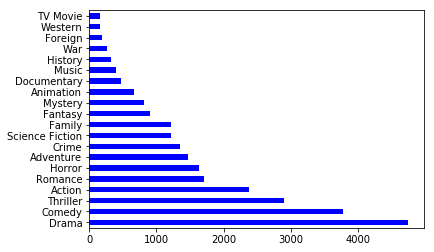

In [19]:
#function to expand in multiple row the data containing | as separator e.g. column cast, genres etc..
def expand_col(dataset, col, sep='|'):
    di = {}
    fx = 0
    for i,d in dataset.iterrows():
        
        names = d[col].split(sep)
        for name in names:
            c = d.copy()
            c[col] = name
            di[fx] = c
            fx += 1

    df_new = pd.DataFrame(di).transpose()
    return df_new

df_genre = expand_col(dff1, 'genres')
df_genre['genres'].value_counts().plot(kind='barh', color= 'blue')

Code adapted from source:http://ramiro.org/notebook/movie-body-counts/

### What was the landscape of film category in 2015?

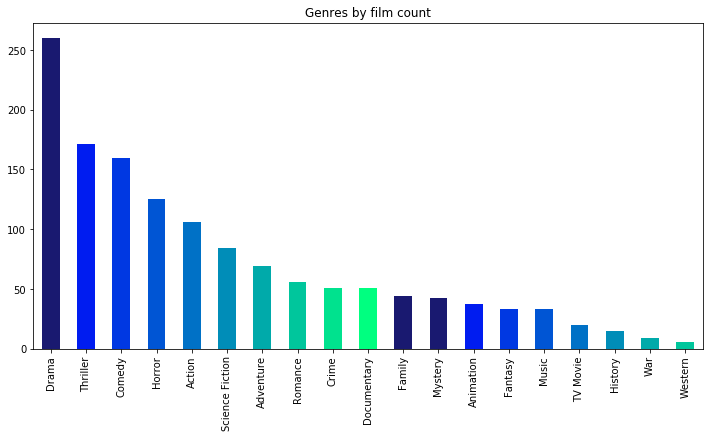

In [20]:
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
df_genre.query('release_year == 2015')['genres'].value_counts().plot(kind='bar',color=colors, figsize=(12, 6), title='Genres by film count')

### What is the trend of drama film from year to year?

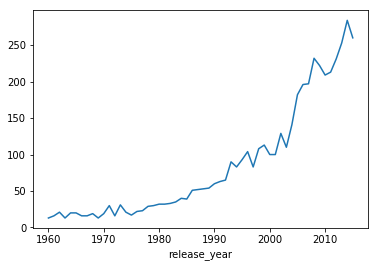

In [21]:
drt=df_genre[df_genre['genres']=='Drama']
drt.groupby('release_year')['id'].count().plot(kind='line')

### Which genres are most popular from year to year?

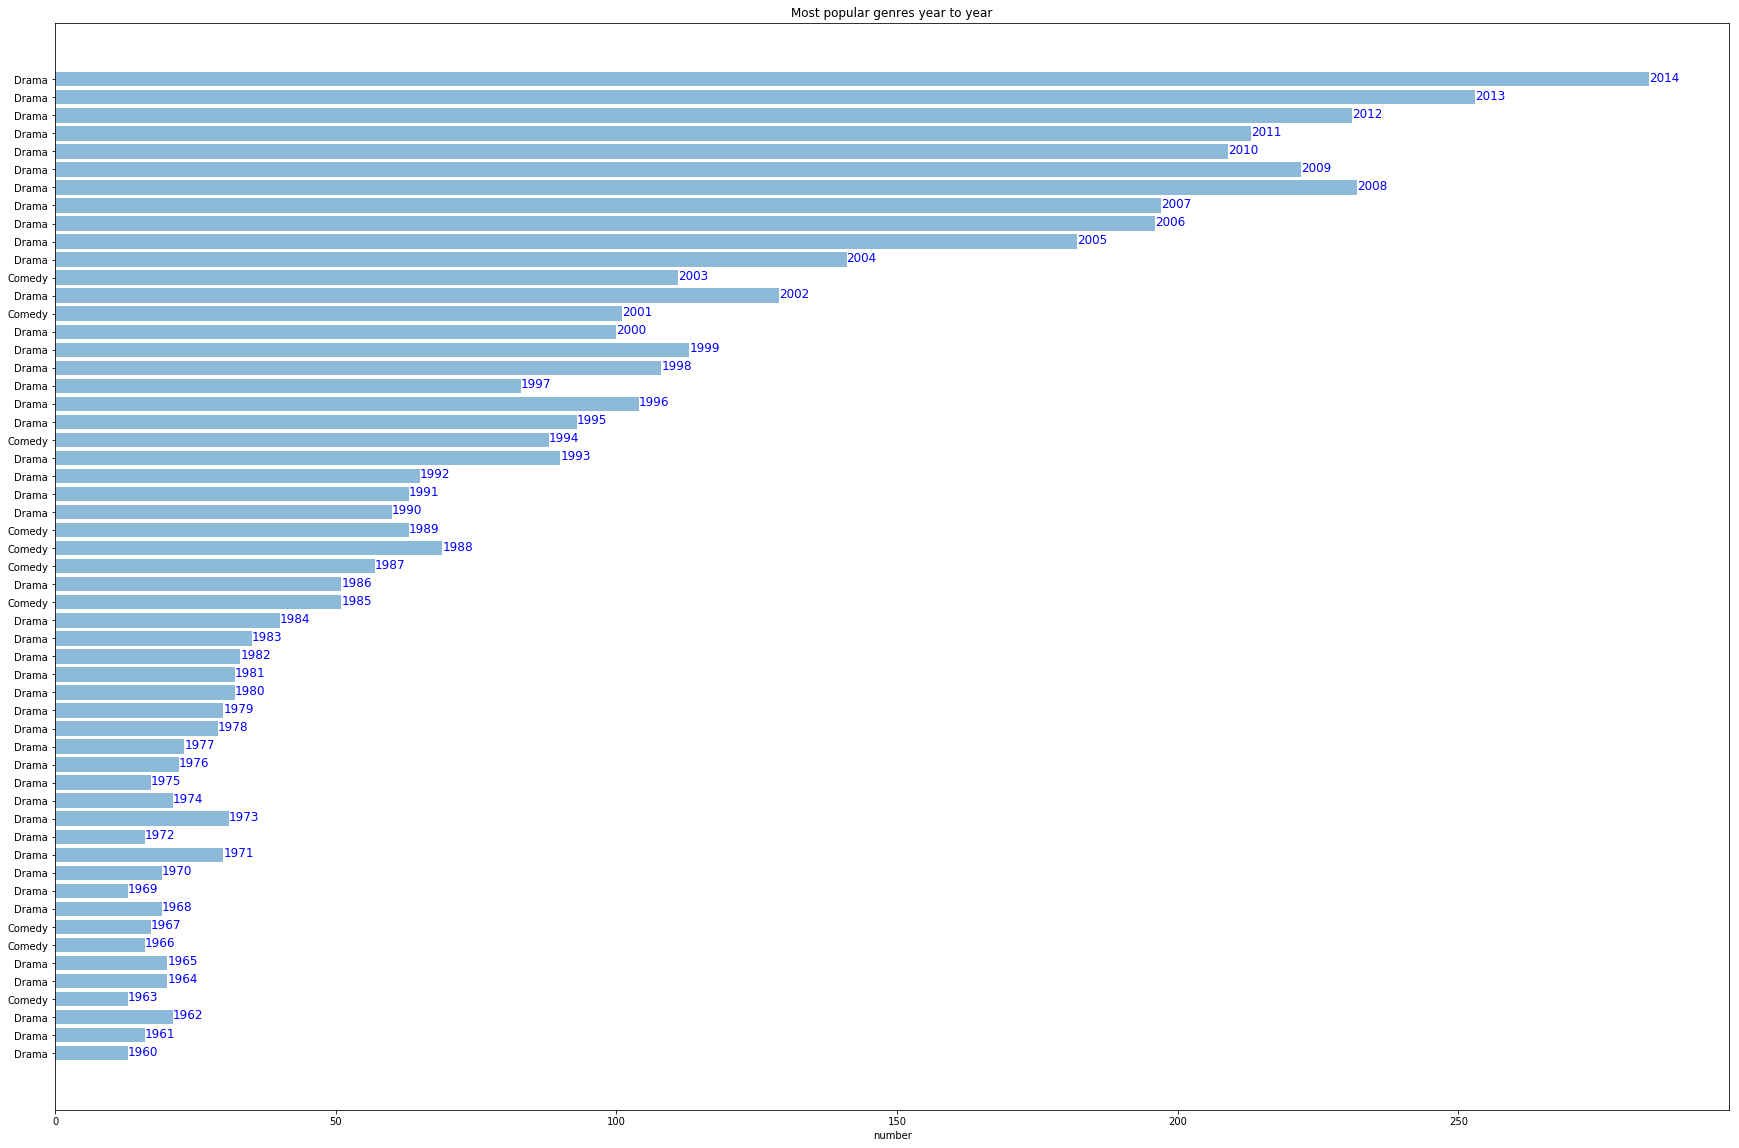

In [22]:
dfr=df_genre.groupby(['release_year','genres']).size()
dfr1=dfr.groupby('release_year').max()
#create 2 lists for year and categories size number
val=[]
year=[]
for i in range(1960,2015,1):
   value=dfr1.loc[i]
   val.append(value)
   year.append(i)
#loop to get the name of the most popular genres by year   
d=[]
for i in range(1960,2015,1):
    drt=df_genre[df_genre['release_year']==i]
    rf=drt.groupby('genres')['id'].count().nlargest(1)
    dtt=pd.DataFrame({'type_film':rf.index, 'list':rf.values})
    c=dtt['type_film'][0]
    d.append(c)
#vizualization part
pos = np.arange(len(d))
fig, ax = plt.subplots(figsize=(30, 20))
plt.barh(pos, val, align='center', alpha=0.5)
for i, v in enumerate(year):
       plt.text(val[i], i-0.1 , str(v), color='blue', fontsize= 12)
plt.yticks(pos, d)
plt.xlabel('number')
plt.title('Most popular genres year to year')

plt.show()

## Exploration regarding vote_average

### What are the first 10 films in terms of vote_average and in which year?

In [23]:
dff1[['original_title', 'vote_average', 'release_year']].sort_values(by=['vote_average'], ascending=False)[:10]

,original_title,vote_average,release_year
3894,The Story of Film: An Odyssey,9.2,2011
1200,Black Mirror: White Christmas,8.8,2014
6911,Pink Floyd: Pulse,8.7,2006
8839,Dave Chappelle: Killin' Them Softly,8.5,2000
3690,The Art of Flight,8.5,2011
8221,A Personal Journey with Martin Scorsese Throug...,8.5,1995
8411,Queen - Rock Montreal,8.5,1981
5923,Tropico,8.4,2013
609,The Jinx: The Life and Deaths of Robert Durst,8.4,2015
4178,The Shawshank Redemption,8.4,1994


### Which vote average got the 10 most expensive films in terms of budget?

In [24]:
dff1[['original_title','vote_average','budget']].sort_values(by=['budget'], ascending=False)[:10]

,original_title,vote_average,budget
2244,The Warrior's Way,6.4,425000000
3375,Pirates of the Caribbean: On Stranger Tides,6.3,380000000
7387,Pirates of the Caribbean: At World's End,6.8,300000000
14,Avengers: Age of Ultron,7.4,280000000
6570,Superman Returns,5.3,270000000
4411,John Carter,6.0,260000000
1929,Tangled,7.3,260000000
7394,Spider-Man 3,5.8,258000000
5508,The Lone Ranger,6.0,255000000
1389,Harry Potter and the Half-Blood Prince,7.3,250000000


### Does the rating in average vary year from year?

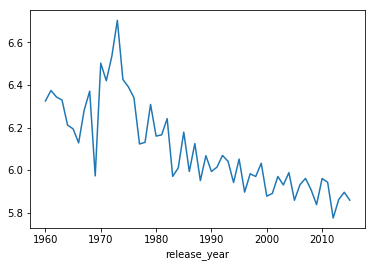

In [25]:
dff1.groupby('release_year')['vote_average'].mean().plot(kind='line')

### Which rating got films with a duration above the mean?

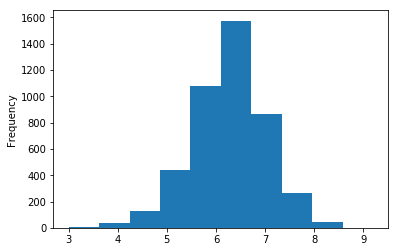

In [26]:
df_duration= dff1.query('runtime > runtime.mean()')
df_duration['vote_average'].plot(kind='hist')

## Exploration regarding revenue

### Is the number of action film generating high revenue is higher in 2010 compared to 2000?

In [27]:
df_dir1 = expand_col(dff1, 'genres')

dataaction = df_dir1[df_dir1.genres == 'Action']
mean_action = dataaction['revenue'].mean()
revenue_action=dataaction.query('revenue > revenue.mean()')
revenue2010= revenue_action.query('release_year == 2010').count()
revenue2000= revenue_action.query('release_year == 2000').count()

Text(0.5,1,'Number of action film with high revenue comparison')

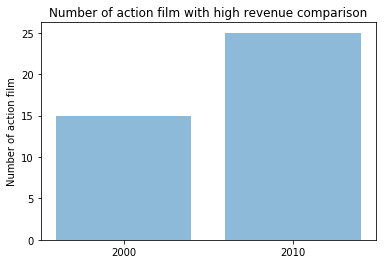

In [28]:
year = ('2000','2010')
nb_ps = np.arange(len(year))
performance = [revenue2000[1], revenue2010[1]]
plt.bar(nb_ps, performance, align='center', alpha=0.5)
plt.xticks(nb_ps, year)
plt.ylabel('Number of action film')
plt.title('Number of action film with high revenue comparison')

### Which films were above mean revenue (the first 10)?

In [29]:
df_dir1 = expand_col(dff1, 'director')

dt= df_dir1.query('revenue > revenue.mean()')

dtt=dt.sort_values(by=['revenue'], ascending=False)

dtt[['original_title','genres', 'release_year', 'director']].head(10)

,original_title,genres,release_year,director
1522,Avatar,Action|Adventure|Fantasy|Science Fiction,2009,James Cameron
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,J.J. Abrams
5716,Titanic,Drama|Romance|Thriller,1997,James Cameron
4763,The Avengers,Science Fiction|Action|Adventure,2012,Joss Whedon
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,Colin Trevorrow
4,Furious 7,Action|Crime|Thriller,2015,James Wan
16,Avengers: Age of Ultron,Action|Adventure|Science Fiction,2015,Joss Whedon
3692,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,2011,David Yates
5914,Frozen,Animation|Adventure|Family,2013,Chris Buck
5915,Frozen,Animation|Adventure|Family,2013,Jennifer Lee


### Which director did more than 15 films above mean revenue?

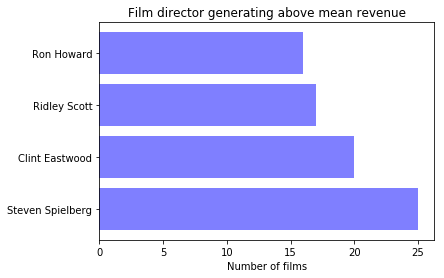

In [30]:
dirname={}
name=[]
value=[]

#I put the director name having more than 15 films above the mean revenue in a list and dictionary
for val, cnt in dt['director'].value_counts().iteritems():
    if cnt > 15:
      dirname[val]= cnt
      name.append(val)

#we put the number of films for each director in a list "value"       
c=len(dirname)
for c in name:
    value.append(dirname[c])
    
pos = np.arange(len(name))
plt.barh(pos, value, align='center', alpha=0.5, color= 'blue')
plt.yticks(pos, name)
plt.xlabel('Number of films')
plt.title('Film director generating above mean revenue')
  
plt.show()

### What is the mean revenue trend from year to year?

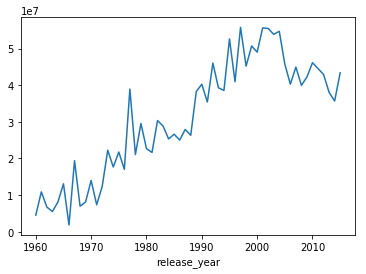

In [31]:
dff1.groupby('release_year')['revenue'].mean().plot(kind='line')

<a id='conclusions'></a>
## Conclusions

The dataset for movies is quite interesting and many additional investigation could be done on different parameters. From what I have choosen, I will just observe trends and get information but without correlate them statiscally (sometimes only tentatively as the hypothesis is not verified). This is one limitiation. The others are concerning the quality of the data loaded on the dataset. 
1. Many rows have incomplete or missing values(i.e. budget and revenue = 0 but a release year was present). I did the choice to keep revenue and budget and neither dropping them not filling with a mean. The size of the cleaning (roughly 50% of the dataset) would have impacted quite significantly others parmeters and would have lowered the data available for them. Nevertheless the columns which were not interesting for this report were simply dropped i.e. tagline for example.
2. Some information were not unique for a film like genres (i.e. action and thriller) which mean that a genre might be quite popular simply due to this information in excess.
3. Some information are also loaded directly by imbd members which explain the redondance and the reliability of the information.
4. Also some information is opposite. For example we have popularity and vote_average which at first sight should be correlated but the mechanism of their calculation is different and therefore lead to different picture of the situation.
<br>  
Finally I will investigate 3 domains: rating (vote_average), film category (genres) and film revenue (revenue).


Exploration of film category:

In the dataset it is related to the column "genres".
According to our investigation we can see that 'drama' genre in 2015 was leading followed by thriller, comedy, horror and action. It is following roughly, the general trend which is drama, comedy, thriller and action in fourth position. We can conclude that these kind of film are quite demanding from customers side. We have explored then what kind of genres is the most popular from year to year and we can see that drama is the most popular one throughout years followed by comedy. In a final graph we can see that since 1960 drama film number are increasing.

Exploration of rating:

For imbd members, the best film is The Story of Film: An Odyssey followed by a serie: Black Miror. The most expensive film in terms of budget are The Warrior's Way followed by Pirates of the Caribbean. We can see that the members rating is quite low and we can as an hypothesis say that a high budget film does not necessary mean a film that people like. The same is true for a lenghty film i.e. the rating around 6 for the longest one. Finally the mean of the vote_average is falling since 1980. Is it a key for saying that film are less interesting? It should be analyzed further in a next report.

Exploration of film revenue:

From our investigation I deduct that action film are generating high revenue and they have risen in terms of quantity if we compare those produced in 2000 and 2010. Since the information start in this dataset, the revenue in average was rising until 2000 and then started to fall a little bit. Nevertheless the directors producing more than 15 films with revenue higher than the mean are the most famous one like Spielberg, Scott, Howard and Eastwood.  